# Final Project
Claudia Hidrogo


CSPB 3022
## Problem Statement
I became interested in air quality after feeling the effects of pollution first hand during my time spent in Asia. The documentary ["Under the Dome"](https://www.youtube.com/watch?v=V5bHb3ljjbc) premiered while I was living in China, and it completely opened my eyes about the dangers of pollution to our health. Thankfully preventing Climate Change has been an ever growing priority for countries across the world, and climate data is becoming more and more valuable.

__For my project I would like to perform a multi-linear regression analysis to predict features that affect air quality in Beijing.__

Resources: 
https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
https://realpython.com/python-histograms/
https://medium.com/analytics-vidhya/outliers-in-data-and-ways-to-detect-them-1c3a5f2c6b1e
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://matplotlib.org/stable/gallery/style_sheets/bmh.html

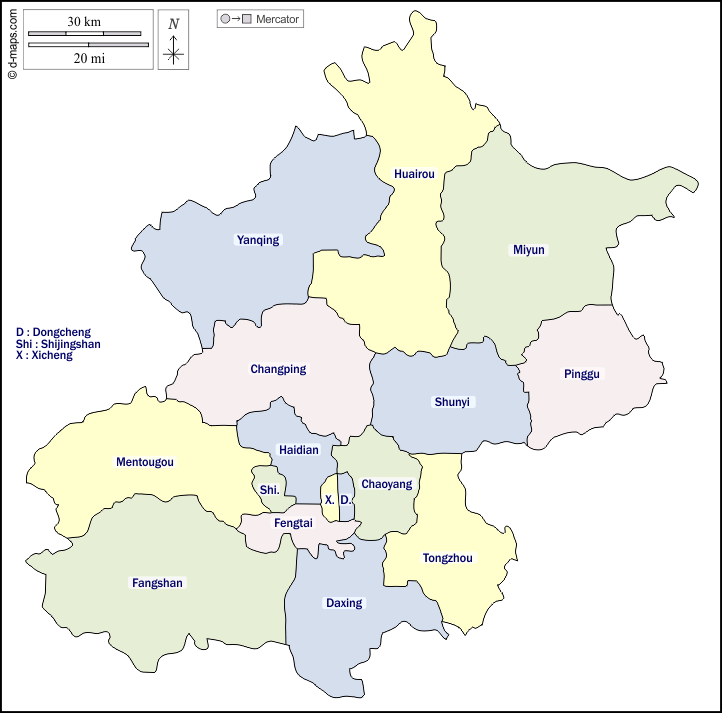


The [image above](https://d-maps.com/carte.php?num_car=21529&lang=en) is a map of districts of the Beijing area. The previous map was a little confusing; the red dots did not indicate the location of the monitoring sites.*

## The Data Set

The data set I will be using for this project is the [Beijing Multi-Site Air-Quality data set](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data#) from UCI Machine Learning Repository. The data set is comprised of 420, 768 hourly measurements of air pollutants data from 12 monitoring sites around Bejing; the time period is hourly from March 1, 2013 to February 28th, 2017. The total data set is comprised of 12 csv files (one for each site), totaling 32.5MB.

### Features

There are 12 main features (out of total 18) for each record in the data set. There are 6 different air pollutant measurements and 6 relevant meteorological measurements. However some features, like the datetime feature (Datetime: Year, Month, Day, Hour), are spread across multiple columns.

| Feature Number | Name | Description | Datatype |
| ----------- | ----------- | ----------- | :-----------: |
|1 | No | row number | Int|
|2| year| year of data in this row| Int|
|3| month| month of data in this row| Int|
|4|day|day of data in this row| Int|
|5| hour| hour of data in this row| Int|
|6| PM2.5| PM2.5 concentration (ug/m^3)| Int|
|7|PM10| PM10 concentration (ug/m^3)| Int|
|8| SO2| SO2 concentration (ug/m^3)| Int|
|9| NO2| NO2 concentration (ug/m^3)| Int|
|10| CO| CO concentration (ug/m^3)| Int|
|11| O3| O3 concentration (ug/m^3)| Int|
|12| TEMP| temperature (degree Celsius)| Float|
|13| PRES| pressure (hPa)| Float|
|14| DEWP| dew point temperature (degree Celsius)| Float|
|15| RAIN| precipitation (mm)| Float|
|16| wd| wind direction| Categorical|
|17| WSPM| wind speed (m/s)| Float|
|18| station| name of the air-quality monitoring site| Categorical|



## Data Cleaning and EDA

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import style
style.use('fivethirtyeight')

### At First Glance..

Below I chose WanLiu station's data to do a cursory analysis of the data. By looking at its shape we can see that there are 35,064 records for this station.

In [2]:
wanliu = pd.read_csv('../data/PRSA_Data_Wanliu_20130301-20170228.csv')
wanliu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [3]:
wanliu.shape

(35064, 18)

After I used the `head()` function I noticed that there were some null values. I ran the following to verify how many nulls were present in the data. There does not seem to be many nulls, but I will need to decided how I will handle these null values; I am considering interpolating data values.

In [4]:
wanliu.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

I have decided to ~run a pairplot~ make a scatterplot so that I can take a quick look to see if there are any clear correlations between features. There seems to be a positive correlation between PM2.5 and PM10 and a negative correlation between PM2.5 and temperature.

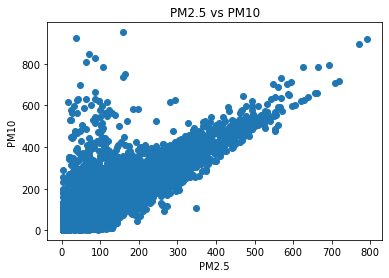

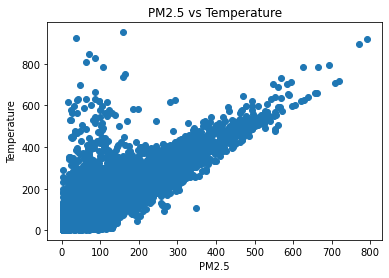

In [5]:
# sns.pairplot(wanliu) # Decided to comment this out because it was a bit overwhelming.. 
pol2_5 = wanliu['PM2.5']
pol10 = wanliu['PM10']
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.title("PM2.5 vs PM10")
plt.scatter(pol2_5, pol10)
plt.show()

temp = wanliu['TEMP']
plt.xlabel("PM2.5")
plt.ylabel("Temperature")
plt.title("PM2.5 vs Temperature")
plt.scatter(pol2_5, pol10)
plt.show()

In [6]:

wanliu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


## Thoughts for the Next Step..



I am treating this as my "todo list," but also functions as a summary. After some light EDA, I noticed that there are some decisions I will need to make regarding the orientation of the data.

One glaring issue is whether I should combine all the station csv files into one large data set, or if I should reorganize them by date. I am considering organizing them by date so that I can "properly" (as far as my understanding of regression goes) use regression to predict future pollution conditions, i.e. use each station's data for the same date/time in my analysis to conduct multi-linear regression. 

The other issue I previously mentioned is how to interpolate the data. A simple solution would be to fill in the missing values with median or mean, but I think there must be a more elegant solution. A quick Google search brought me to a basic formula for [linear interpolation](https://en.wikipedia.org/wiki/Interpolation) below. I will need to look into it further..

$$ y = y_{1} + (x -x_{1}) * \frac{y_{2} -y_{1}}{x_{2}-x_{1}}$$

## Further EDA

### Data Clean Up

I decided to organize the data so that it was organized by year. I considered doing it by date, but thought that it would be too modular if I had to divide them into over 1,000 days. I also decided to drop the `No` column because the data was redundant. I am thinking of dropping the month, day, year columns that I've used to create the date column, but I have left them temporarily to make selecting easier.

In [3]:
aotizhongxin = pd.read_csv('../data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping = pd.read_csv('../data/PRSA_Data_Changping_20130301-20170228.csv')
dingling = pd.read_csv('../data/PRSA_Data_Dingling_20130301-20170228.csv')
dongsi = pd.read_csv('../data/PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan = pd.read_csv('../data/PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng = pd.read_csv('../data/PRSA_Data_Gucheng_20130301-20170228.csv')
huairou = pd.read_csv('../data/PRSA_Data_Huairou_20130301-20170228.csv')
nongzhuanguan = pd.read_csv('../data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi = pd.read_csv('../data/PRSA_Data_Shunyi_20130301-20170228.csv')
tiantan = pd.read_csv('../data/PRSA_Data_Tiantan_20130301-20170228.csv')
wanshouxigong = pd.read_csv('../data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [4]:
data = pd.DataFrame()
data = data.append([aotizhongxin, changping, dingling, dongsi, guanyuan, gucheng, huairou, nongzhuanguan, shunyi, tiantan, wanliu, wanshouxigong])
data.drop(columns=['No'], inplace = True)
data.rename(columns = {'PM2.5':'PM2_5'}, inplace = True) # to prevent errors with some function calls
data['date']=pd.to_datetime(data[['year', 'month', 'day']])

In [9]:
data.head()

,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01


In [10]:
data_2013 = data[data["year"] == 2013]
data_2014 = data[data["year"] == 2014]
data_2015 = data[data["year"] == 2015]
data_2016 = data[data["year"] == 2016]
data_2017 = data[data["year"] == 2017]

#### Dealing with Missing Data



Earlier, I had mentioned that I was debating filling in missing values by interpolation. After doing some research I had found [Panda's Guide to Working with Missing Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation) and learned about some other methods of filling in missing data values. There are quite a few [methods of interpolation](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html). To be honest, I am a little overwhelmed by the variety of methods of interpolation. 

I am still researching which would be the best method, but before I can do that I need to do some outlier detection.

#### Outlier Detection

In [11]:
data.isnull().sum()

year           0
month          0
day            0
hour           0
PM2_5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
date           0
dtype: int64

In [12]:
ratio_of_missing_data = data.isnull().sum()/len(data.index)
ratio_of_missing_data

year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2_5      0.020769
PM10       0.015327
SO2        0.021439
NO2        0.028795
CO         0.049198
O3         0.031554
TEMP       0.000946
PRES       0.000934
DEWP       0.000958
RAIN       0.000927
wd         0.004330
WSPM       0.000756
station    0.000000
date       0.000000
dtype: float64

By taking a quick look at the amount of missing values in the overall data, we can see that there are a miniscule amount of missing values. With the CO lying at about 4.9% for the most amount of missing values. I will need to do some further investigation into the data. We will take a look at CO to see if there are any outliers with a boxplot and then see the general shape with a histogram.

Text(0.5, 1.0, 'CO by Year')

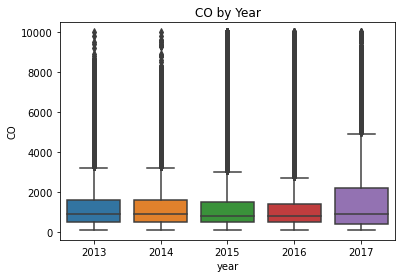

In [13]:
sns.boxplot(x='year', y='CO', data=data).set_title("CO by Year")

<AxesSubplot:ylabel='Frequency'>

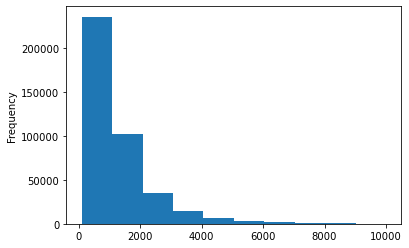

In [14]:
data.CO.plot.hist()

## Model Approach

Because there are a few correlating features I assume that these features are similiar enough that I will not need each correlating feature, and can eliminate one. For example, I am thinking of dropping PM2.5 or PM10 They have a strong correlation, as they are both pollutants, with the only differing factor being their size; PM2.5 is smaller, but more dangerous because it has a much higher chance of being drawn into the lung without being caught by hair or mucus.

I will trim these correlated features because I do not want the similar factors to obfiscate the regression model. __I think I will try out both a multi-linear and non-linear regression model for this analysis. I would like to compare the fit of both.__

In [15]:
data.corr()

,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.025836,-0.037723,-0.170246,-0.056270,0.007861,-0.024384,-0.151791,0.186662,-0.164818,0.000975,0.087472
month,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,0.010438,-0.025380,-0.213898,0.042293,0.046648,-0.103691,0.131323,-0.012795,0.265774,0.016066,-0.139666
day,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,0.003428,0.026015,-0.005146,0.009878,-0.015692,0.002829,0.014390,0.021758,0.023070,-0.003699,-0.011646
hour,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.011709,0.051426,0.029947,-0.001559,-0.031358,0.282287,0.141983,-0.038367,-0.012216,0.012381,0.140486
PM2_5,-2.583578e-02,1.043824e-02,3.428114e-03,1.170939e-02,1.000000,0.884380,0.482354,0.666948,0.789998,-0.149697,-0.131127,0.018566,0.114656,-0.014359,-0.272205
PM10,-3.772263e-02,-2.537989e-02,2.601467e-02,5.142637e-02,0.884380,1.000000,0.462651,0.652193,0.702363,-0.111294,-0.096209,-0.017971,0.070310,-0.026519,-0.183665
SO2,-1.702462e-01,-2.138978e-01,-5.145818e-03,2.994683e-02,0.482354,0.462651,1.000000,0.499496,0.535750,-0.165341,-0.321799,0.223236,-0.266781,-0.040241,-0.108717
NO2,-5.627017e-02,4.229308e-02,9.877839e-03,-1.558836e-03,0.666948,0.652193,0.499496,1.000000,0.705500,-0.471587,-0.278192,0.174167,-0.031599,-0.043785,-0.400460
CO,7.861472e-03,4.664755e-02,-1.569193e-02,-3.135823e-02,0.789998,0.702363,0.535750,0.705500,1.000000,-0.313012,-0.326237,0.188195,-0.057129,-0.013342,-0.297511
O3,-2.438435e-02,-1.036914e-01,2.829179e-03,2.822873e-01,-0.149697,-0.111294,-0.165341,-0.471587,-0.313012,1.000000,0.594910,-0.445961,0.312074,0.023320,0.295743


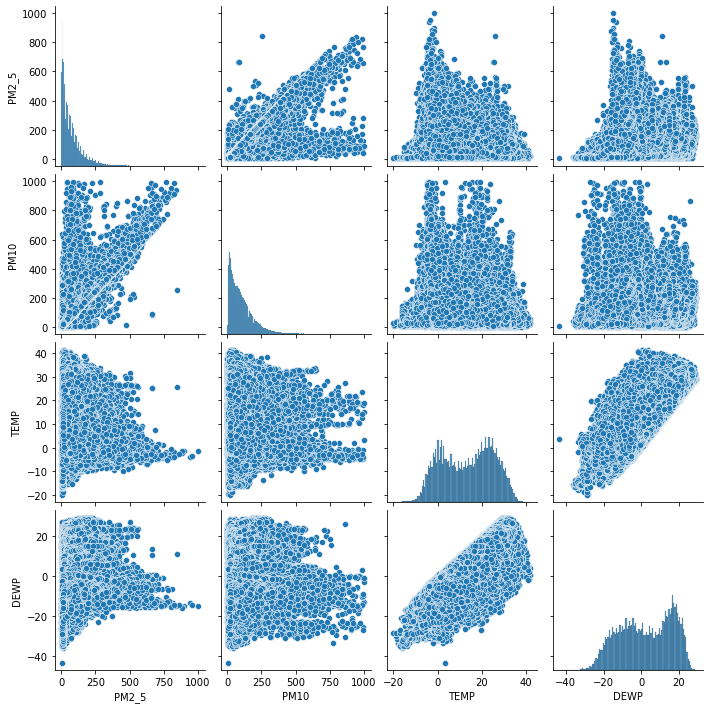

In [16]:
sns.pairplot(data[['PM2_5', 'PM10', 'TEMP', 'DEWP']])

I am thinking that PM2.5 is a good indication of PM10, so I think I will only use one in my model. However, at smaller concentrations there is more variance in the residuals, so they do not fit linearly.

In [17]:

PM_est = smf.ols('PM10 ~ PM2_5', data).fit()
PM_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 1.478e+06
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:18:18   Log-Likelihood:            -2.1315e+06
No. Observations:              411813   AIC:                         4.263e+06
Df Residuals:                  411811   BIC:                         4.263e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4795      0.094    260.934      0.000      24.296      24.663
PM2_5          1.0055      0.001   1215.867      0.000       1.004       1.007
==============================================================================
Omnibus:                   406209.368   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43177790.350
Skew:                           4.611   Prob(JB):                         0.00
Kurtosis:                      52.308   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'PM10')

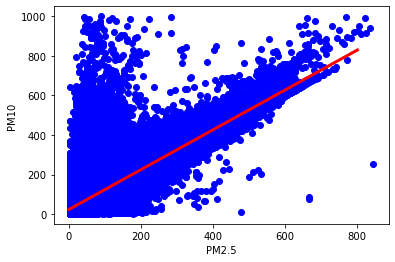

In [18]:
plt.plot(data.PM2_5, data.PM10, 'bo')
xticks = np.linspace(0, 800)
plt.plot(xticks, PM_est.params[0] + xticks * PM_est.params[1], 'r', lw=3)
plt.xlabel('PM2.5')
plt.ylabel('PM10')

## Final Data Prep for Model

### Further Feature Arrangement

In order to be able to predict pollution levels I must first define pollution for my model. Aften taking a look at the correlation between `PM2.5` and `PM10` I have decided to combine these two features into a new feature by which I will operational define pollution. In addition, I have also decided to drop the `station` and `date` features. Although I did originally create the `date` feature, I have realized that I can perform a much more targeted analysis when the feature is separated into further features. 

In [5]:
data["pol"] = data["PM2_5"] + data["PM10"]
data.drop(columns=['PM2_5', 'PM10', 'station', 'date'], inplace = True)
data.head()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,pol
0,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,8.0
1,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,16.0
2,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,14.0
3,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,12.0
4,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,6.0


I have also decided to map the unique values in the wind direction feature. 

In [6]:
data.wd = pd.Categorical(data.wd)
data.wd.value_counts()

NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64

In [7]:
data.wd = data.wd.cat.codes

### Missing Data Resolution

After conferring with my peers and professor, I came to the conclusion that I will use the mean of each column to fill in the missing data points. As was pointed out by a peer, the amount of missing data is negligible and should not detrimentally affect the analysis.

In [8]:
data["wd"].replace({-1: data.wd.mean()}, inplace=True)

In [9]:
data = data.fillna(data.mean())
# data['CO'].fillna((data['CO'].mean()), inplace=True) # for one column
data.head()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,pol
0,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6.0,4.4,8.0
1,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3.0,4.7,16.0
2,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6.0,5.6,14.0
3,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7.0,3.1,12.0
4,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3.0,2.0,6.0


In [10]:
data.isna().sum()

year     0
month    0
day      0
hour     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
pol      0
dtype: int64

### Data Normalization

## Model Implementation

For my model, I have decided to perform Backwards Stepwise Selection. 

In [25]:
data.corr()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,pol
year,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.168632,-0.055590,0.007555,-0.023968,-0.151670,0.186519,-0.164686,0.000975,-0.026860,0.087429,-0.033578
month,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,-0.211783,0.041690,0.045478,-0.101881,0.131213,-0.012784,0.265549,0.016052,-0.032704,-0.139573,-0.007935
day,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,-0.005085,0.009725,-0.015321,0.002784,0.014385,0.021749,0.023061,-0.003697,0.002035,-0.011642,0.015509
hour,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.029626,-0.001538,-0.030604,0.277640,0.141924,-0.038351,-0.012211,0.012376,0.165469,0.140437,0.033704
SO2,-1.686324e-01,-2.117831e-01,-5.085191e-03,2.962574e-02,1.000000,0.491109,0.524707,-0.162283,-0.318067,0.220414,-0.263895,-0.040029,-0.013456,-0.107549,0.479880
NO2,-5.558991e-02,4.169005e-02,9.725404e-03,-1.538160e-03,0.491109,1.000000,0.688207,-0.463523,-0.273864,0.171262,-0.031135,-0.043357,-0.106697,-0.393849,0.670850
CO,7.554741e-03,4.547757e-02,-1.532101e-02,-3.060377e-02,0.524707,0.688207,1.000000,-0.305255,-0.317872,0.183004,-0.055615,-0.013008,-0.118871,-0.290044,0.746798
O3,-2.396825e-02,-1.018805e-01,2.783523e-03,2.776401e-01,-0.162283,-0.463523,-0.305255,1.000000,0.585303,-0.438657,0.307678,0.023146,0.206390,0.291641,-0.131374
TEMP,-1.516702e-01,1.312126e-01,1.438453e-02,1.419243e-01,-0.318067,-0.273864,-0.317872,0.585303,1.000000,-0.813300,0.820115,0.037635,0.095864,0.033029,-0.114281
PRES,1.865188e-01,-1.278446e-02,2.174941e-02,-3.835094e-02,0.220414,0.171262,0.183004,-0.438657,-0.813300,1.000000,-0.750212,-0.060948,-0.070152,0.065086,-0.001155


In [11]:
train_data_cols = list(data.columns)
train_data_cols.remove('pol')
train_data = data[train_data_cols]
test_data = data['pol']
train_data.head()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6.0,4.4
1,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3.0,4.7
2,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6.0,5.6
3,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7.0,3.1
4,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3.0,2.0


After defining my output value to be pollution (`pol`), I decided to run a backwards stepwise selection. Starting with a model with all current features. 

In [12]:
def get_model_stats(x, y):
    results = sm.OLS(y, x).fit()
    #print(results.summary())
    return results

In [13]:
#backwards selection

# first model
model = get_model_stats(train_data, test_data)

counter = len(train_data.columns) #start with one less
while counter > 0:
    new_model = get_model_stats(train_data.iloc[:, :counter], test_data)
    if new_model.rsquared > model.rsquared:
        model = new_model
    counter = counter - 1
print(model.summary())    

                                 OLS Regression Results                                
Dep. Variable:                    pol   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          1.700e+05
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                        0.00
Time:                        05:53:26   Log-Likelihood:                     -2.5179e+06
No. Observations:              420768   AIC:                                  5.036e+06
Df Residuals:                  420754   BIC:                                  5.036e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

After running my backwards stepwise selection, it appears that the first model remained the best fitting model with an r-squared value of .85. Each of the features had a good p-value and all of their confidence intervals did not include 0.

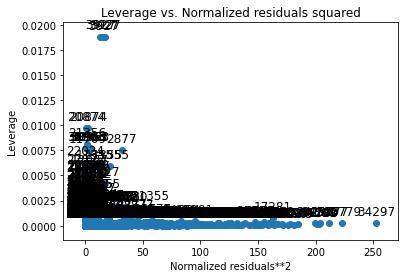

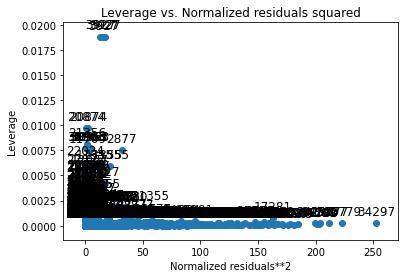

In [15]:
sm.graphics.plot_leverage_resid2(model, alpha=0.05)

In [ ]:
sns.pairplot(data[['NO2', 'CO', 'O3', 'DEWP']])

## Conclusion and Next Steps

By investigating the t-value, in addition to the slim confidience intervals, it appears that the three most influential features that impact the level of pollution are: `NO2`, `CO`, `O3`, and `Dew Point`. 

The size of the data set was certainly a challenge when computing and comparing the countless models. However, I was plesantly surprised that we were able to get a decent r-squared statistic. I wouldv'e liked to be able to conduct several more analyses, especially with the time features. The next step I would take is to use not only linear models, but quadratic and cubic models with the `month` and `year` features specifically. I suspect there is a seasonal quality to the data. 

However, overall this was an incredible opportunity to get my feet wet in data science, working with data manipulation, and learning data vizualization as well. 

In [12]:
month = data.month
conditions = [
    month.eq(12) | month.eq(1) | month.eq(2),
	month.eq(3) | month.eq(4) | month.eq(5),
	month.eq(6) | month.eq(7) | month.eq(8),
	month.eq(9) | month.eq(10) | month.eq(11)
]

values = ['winter', 'spring', 'summer', 'fall']
data["season"] = np.select(conditions, values)

<AxesSubplot:title={'center':'Which season saw the most pollution?'}, xlabel='Season', ylabel='Number of data points'>

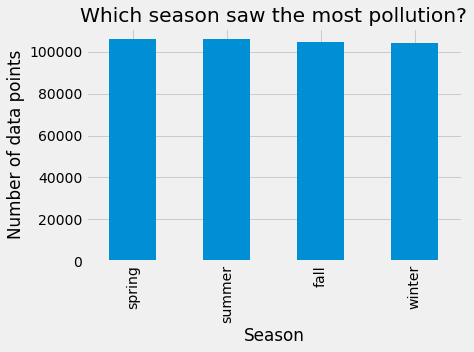

In [13]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("Season")
ax.set_ylabel("Number of data points")
ax.set_title("Which season saw the most pollution?")


data.season.value_counts().plot(kind='bar')

Comparing the seasons together there doesn't seem to be much difference. However, when we compare month-to-month we can see a striking trend..

<AxesSubplot:title={'center':'Which month saw the most Pollution?'}, xlabel='Month', ylabel='Frequency'>

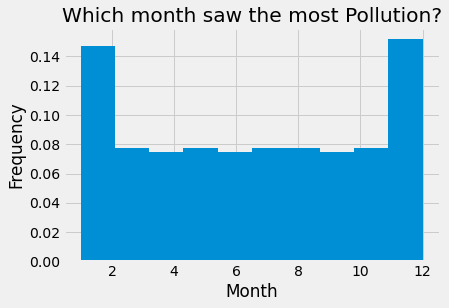

In [14]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("Month")
ax.set_title("Which month saw the most Pollution?")
data.month.plot(kind="hist", bins=10, density=True)